# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Dicky Ary Setiawan
- **Email:** DickyAry54@gmail.com
- **ID Dicoding:** ruhe54

## Menentukan Pertanyaan Bisnis

- Apakah wilayah ini terjadi polusi udara ?
- Apakah curah hujan mempengaruhi polusi udara ?
- bagaimana pengaruh O3 dengan temperature udara ?

## Import Semua Packages/Library yang Digunakan

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [26]:
tiantan_df = pd.read_csv("PRSA_Data_Tiantan_20130301-20170228.csv")
tiantan_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [27]:
tiantan_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan
35060,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9,Tiantan
35061,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan
35062,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Tiantan


In [28]:
tiantan_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
18842,18843,2015,4,25,2,51.0,108.0,2.0,68.0,600.0,12.0,13.2,1012.8,5.6,0.0,SSE,0.5,Tiantan
23211,23212,2015,10,24,3,74.0,74.0,3.0,23.0,1400.0,2.0,9.4,1015.3,8.9,0.0,E,1.0,Tiantan
21552,21553,2015,8,16,0,25.0,58.0,5.0,41.0,600.0,105.0,27.3,1001.2,16.0,0.0,WSW,1.1,Tiantan
16224,16225,2015,1,6,0,6.0,17.0,16.0,23.0,300.0,57.0,-1.0,1024.0,-26.0,0.0,N,3.1,Tiantan
2065,2066,2013,5,26,1,103.0,135.0,23.0,58.0,1100.0,14.0,20.8,1004.8,16.2,0.0,E,1.2,Tiantan


**Insight:**
- Pada data diatas dapat dilihat bahwa data diambil setiap jam selama 5 tahun berturut-turut
- Nilai PM2.5 dan PM10 menunjukkan bahwa semakin besar nilai yang didapat maka semakin jelek kualitas udaranya
- Saat terjadi hujan nilai PM2.5 dan PM10 terjadi penurunan sehingga kualitas udara dapat diperbaiki meskipun sedikit

### Assessing Data

In [29]:
tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [30]:
tiantan_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,677
PM10,597
SO2,1118
NO2,744
CO,1126


In [31]:
print(f"Jumlah duplicate : {tiantan_df.duplicated().sum()}")

Jumlah duplicate : 0


In [32]:
tiantan_df.describe()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [33]:
tiantan_df[tiantan_df.PM10 == tiantan_df.PM10.max()]


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
25779,25780,2016,2,8,3,821.0,988.0,182.0,88.0,1900.0,3.0,-2.6,1008.8,-14.4,0.0,W,0.6,Tiantan


**Insight:**
- Pada data ini terdapat banyak sekali nilai Nan tetapi tidak terdapat nilai duplicate
- pada nilai PM10 nilai maksimum yang dicapai adalah 988 dan nilai minimum adalah 2. sehingga dapat diambil kesimpulan bahwa polusi yang terjadi pada daerah ini dalam keadaan yang sangat buruk
- nilai PM10 tertinggi terjadi pada tahun 2016 bulan february tanggal 8 pada jam 3 pagi

### Cleaning Data

In [34]:
tiantan_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,677
PM10,597
SO2,1118
NO2,744
CO,1126


In [35]:
tiantan_df = tiantan_df.fillna(method='ffill')
tiantan_df.isna().sum()

<ipython-input-35-fd5fb3415f68>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tiantan_df = tiantan_df.fillna(method='ffill')


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [36]:
day_df = tiantan_df.groupby(by=['year','month','day']).agg({
    'PM2.5' : 'mean',
    'PM10' : 'mean',
    'SO2' : 'mean',
    'NO2' : 'mean',
    'CO' : 'mean',
    'O3' : 'mean',
    'TEMP' : 'mean',
    'PRES' : 'mean',
    'DEWP' : 'mean',
    'RAIN' : 'mean',
    'WSPM' : 'mean',
})
day_df

PM2.5        PM10        SO2         NO2           CO  \
year month day                                                               
2013 3     1      8.625000   14.458333   8.875000   21.583333   450.000000   
           2     31.708333   37.041667  26.458333   49.458333   912.500000   
           3     98.041667  121.333333  55.625000   82.958333  2028.958333   
           4     22.333333   37.583333  16.583333   42.041667   895.791667   
           5    141.666667  156.375000  74.333333  101.666667  2408.000000   
...                    ...         ...        ...         ...          ...   
2017 2     24    36.416667   51.875000   6.708333   51.833333   925.000000   
           25    10.208333   23.041667   5.083333   35.791667   458.333333   
           26    24.166667   41.916667   7.500000   52.208333   612.500000   
           27    77.625000  114.125000  18.083333   89.833333  1504.166667   
           28    14.875000   32.708333   6.166667   40.166667   520.833333   

                       O3       TEMP         PRES       DEWP  RAIN      WSPM  
year month day                                                                
2013 3     1    68.083333   1.325000  1028.783333 -21.466667   0.0  3.308333  
           2    34.041667   0.491667  1028.850000 -16.962500   0.0  0.791667  
           3    16.916667   4.987500  1016.458333 -12.312500   0.0  1.225000  
           4    53.125000  10.562500  1019.454167 -14.000000   0.0  2.504167  
           5    94.000000   7.212500  1012.704167  -7.783333   0.0  0.912500  
...                   ...        ...          ...        ...   ...       ...  
2017 2     24   40.875000   5.166667  1021.012500 -11.141667   0.0  1.595833  
           25   60.166667   7.245833  1018.812500 -10.754167   0.0  1.825000  
           26   44.458333   7.208333  1020.337500  -8.258333   0.0  1.566667  
           27   19.250000   8.337500  1017.141667  -7.145833   0.0  1.516667  
           28   63.666667  10.958333  1014.887500 -12.783333   0.0  2.058333  

[1461 rows x 11 columns]

In [37]:
month_df = day_df.groupby(by=['year','month']).agg({
    'PM2.5' : 'mean',
    'PM10' : 'mean',
    'SO2' : 'mean',
    'NO2' : 'mean',
    'CO' : 'mean',
    'O3' : 'mean',
    'TEMP' : 'mean',
    'PRES' : 'mean',
    'DEWP' : 'mean',
    'RAIN' : 'mean',
    'WSPM' : 'mean',
})
month_df

PM2.5        PM10        SO2        NO2           CO  \
year month                                                              
2013 3      106.228495  123.461022  37.718063  64.045248  1558.427419   
     4       60.944444   90.766667  21.263254  43.594327   984.637500   
     5       80.490591  138.193548  26.998656  42.267473  1097.356183   
     6      110.538889  133.738889  15.279959  48.787583  1442.623611   
     7       69.305108   84.125000   6.993353  43.394548  1071.215054   
     8       64.237903   82.314516   6.286671  40.774799   923.521505   
     9       80.237500  105.884722  10.450387  57.727285  1323.598611   
     10      95.069892  118.759409  13.325233  65.641869  1293.145161   
     11      80.386111  103.420833  14.573611  57.394444  1531.527778   
     12      85.126344  102.494624  28.760184  68.105569  1945.295699   
2014 1      102.337366  128.745968  48.352151  73.995968  2007.795699   
     2      146.651786  149.824405  58.196429  70.010417  2207.738095   
     3       94.329301  127.770161  33.583333  65.467742  1440.456989   
     4       85.488889  126.700000  16.322222  54.213889   941.944444   
     5       63.324597  114.278091   8.263441  44.716667   896.236559   
     6       60.548611   82.463889   7.709722  40.279167   913.055556   
     7       91.939516  115.530914   6.854839  36.481183  1012.634409   
     8       67.829435   84.542876   5.454032  43.393280   934.543011   
     9       68.487500   85.384722   7.688889  50.136250  1085.972222   
     10     115.958333  138.548387  10.938172  71.827957  1447.446237   
     11      88.591667  125.965417  10.709722  62.480139  1597.361111   
     12      67.226613  107.361290  24.083065  60.373387  1682.930108   
2015 1      101.603226  115.319892  29.101075  68.452285  1873.924731   
     2       96.409226  121.169643  22.686012  51.602679  1435.863095   
     3       87.770968  136.380376  18.918011  51.746237  1160.080645   
     4       73.834722  110.154583   8.886111  44.219444   780.138889   
     5       53.793011   93.928763  10.021505  42.682796   734.811828   
     6       62.170833   79.769722   7.040278  42.515278  1273.333333   
     7       63.809140   75.575269   5.159946  41.497312   935.752688   
     8       47.572581   60.913978   5.336022  37.052419   875.403226   
     9       49.409722   61.825000   6.291667  48.961111   897.916667   
     10      71.943548   88.940860   5.331989  56.202957   974.731183   
     11     121.436111  126.179167  10.831944  60.879167  1876.666667   
     12     157.431452  163.791667  12.760753  77.943548  2823.387097   
2016 1       71.459677   87.153226  18.099462  60.180108  1592.473118   
     2       44.757184   60.926724  12.903736  40.380747   925.431034   
     3       90.569892  125.166667  15.879032  60.798387  1227.553763   
     4       66.345833  111.969444  11.294444  45.111111   849.861111   
     5       48.938172   88.939516   9.251344  36.094086   702.553763   
     6       62.522222   81.119444   6.073611  35.995833   788.333333   
     7       71.155914   76.458333   4.677419  32.482527   963.575269   
     8       48.275538   58.595430   3.061828  35.306452   879.569892   
     9       56.070833   68.559722   3.501389  46.701389   830.833333   
     10      80.447581   97.084677   4.180108  53.120968  1214.919355   
     11      99.848611  130.697222   8.008333  68.009722  1789.444444   
     12     143.251344  178.506720  10.336022  84.586022  2552.956989   
2017 1      121.552419  153.069892  14.106183  71.052419  2299.865591   
     2       71.928571   96.025298  14.038690  56.197917  1197.172619   

                    O3       TEMP         PRES       DEWP      RAIN      WSPM  
year month                                                                     
2013 3       63.548901   6.256989  1014.456855  -7.030511  0.020968  1.969624  
     4       76.540954  12.632361  1009.933056  -3.778056  0.012222  2.571389  
     5       81.729872  21.929301  1004.748253

**Insight:**
- Pada data diatas banyak sekali nilai Na terutama pada nilai CO dan SO2
- Untuk mengisi nilai Na digunakan metode ffill dikarenakan data diatas diambil satu jam sekali sehingga kemunggkinan nilai berubah tidak akan terlalu besar, jika dilakukan dropna maka kita akan kehilangan data yang sangat banyak

## Exploratory Data Analysis (EDA)

### Explore ...

In [38]:
month_df.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,82.283067,106.635346,14.532965,53.226711,1308.250346,56.398639,13.606782,1012.601116,2.372632,0.063717,1.861820
std,26.389060,28.233775,11.565604,12.945691,500.520923,29.962565,10.569992,8.800629,12.548846,0.086124,0.344569
min,44.757184,58.595430,3.061828,32.482527,702.553763,13.588710,-4.550000,997.453898,-18.059677,0.000000,1.271237
25%,63.688004,84.438407,6.958724,42.640916,924.953652,27.508031,2.801217,1003.554772,-8.882628,0.003226,1.574223
50%,77.036111,106.623006,10.770833,51.674458,1178.626632,53.104653,13.880914,1013.236761,3.612796,0.024442,1.808987
75%,95.404726,126.309375,16.766532,62.871416,1566.938844,82.506409,22.636567,1020.897755,14.316181,0.093733,2.083804
max,157.431452,178.506720,58.196429,84.586022,2823.387097,103.572581,28.170833,1025.950000,20.801210,0.423387,2.571389


In [39]:
month_df['air_condition'] = ['jelek' if x >= 150 else 'sedang' if x >= 50 or x < 150 else 'bagus' for x in month_df['PM10']]

Dikutip dari website resmi BMKG.go.id

PM10 adalah partikel udara yang berukuran lebih kecil dari 10 mikron. Nilai ambang batas adalah 150 µgram/m3 dimana jika nilai diantara 0 – 50 µgram/m3  dianggap kondisi udara maik baik , 51-150 µgram/m3  dianggap sedang, dan untuk jika lebih besar dari 150 µgram/m3   dianggap tidak sehat


In [40]:
month_df

PM2.5        PM10        SO2        NO2           CO  \
year month                                                              
2013 3      106.228495  123.461022  37.718063  64.045248  1558.427419   
     4       60.944444   90.766667  21.263254  43.594327   984.637500   
     5       80.490591  138.193548  26.998656  42.267473  1097.356183   
     6      110.538889  133.738889  15.279959  48.787583  1442.623611   
     7       69.305108   84.125000   6.993353  43.394548  1071.215054   
     8       64.237903   82.314516   6.286671  40.774799   923.521505   
     9       80.237500  105.884722  10.450387  57.727285  1323.598611   
     10      95.069892  118.759409  13.325233  65.641869  1293.145161   
     11      80.386111  103.420833  14.573611  57.394444  1531.527778   
     12      85.126344  102.494624  28.760184  68.105569  1945.295699   
2014 1      102.337366  128.745968  48.352151  73.995968  2007.795699   
     2      146.651786  149.824405  58.196429  70.010417  2207.738095   
     3       94.329301  127.770161  33.583333  65.467742  1440.456989   
     4       85.488889  126.700000  16.322222  54.213889   941.944444   
     5       63.324597  114.278091   8.263441  44.716667   896.236559   
     6       60.548611   82.463889   7.709722  40.279167   913.055556   
     7       91.939516  115.530914   6.854839  36.481183  1012.634409   
     8       67.829435   84.542876   5.454032  43.393280   934.543011   
     9       68.487500   85.384722   7.688889  50.136250  1085.972222   
     10     115.958333  138.548387  10.938172  71.827957  1447.446237   
     11      88.591667  125.965417  10.709722  62.480139  1597.361111   
     12      67.226613  107.361290  24.083065  60.373387  1682.930108   
2015 1      101.603226  115.319892  29.101075  68.452285  1873.924731   
     2       96.409226  121.169643  22.686012  51.602679  1435.863095   
     3       87.770968  136.380376  18.918011  51.746237  1160.080645   
     4       73.834722  110.154583   8.886111  44.219444   780.138889   
     5       53.793011   93.928763  10.021505  42.682796   734.811828   
     6       62.170833   79.769722   7.040278  42.515278  1273.333333   
     7       63.809140   75.575269   5.159946  41.497312   935.752688   
     8       47.572581   60.913978   5.336022  37.052419   875.403226   
     9       49.409722   61.825000   6.291667  48.961111   897.916667   
     10      71.943548   88.940860   5.331989  56.202957   974.731183   
     11     121.436111  126.179167  10.831944  60.879167  1876.666667   
     12     157.431452  163.791667  12.760753  77.943548  2823.387097   
2016 1       71.459677   87.153226  18.099462  60.180108  1592.473118   
     2       44.757184   60.926724  12.903736  40.380747   925.431034   
     3       90.569892  125.166667  15.879032  60.798387  1227.553763   
     4       66.345833  111.969444  11.294444  45.111111   849.861111   
     5       48.938172   88.939516   9.251344  36.094086   702.553763   
     6       62.522222   81.119444   6.073611  35.995833   788.333333   
     7       71.155914   76.458333   4.677419  32.482527   963.575269   
     8       48.275538   58.595430   3.061828  35.306452   879.569892   
     9       56.070833   68.559722   3.501389  46.701389   830.833333   
     10      80.447581   97.084677   4.180108  53.120968  1214.919355   
     11      99.848611  130.697222   8.008333  68.009722  1789.444444   
     12     143.251344  178.506720  10.336022  84.586022  2552.956989   
2017 1      121.552419  153.069892  14.106183  71.052419  2299.865591   
     2       71.928571   96.025298  14.038690  56.197917  1197.172619   

                    O3       TEMP         PRES       DEWP      RAIN      WSPM  \
year month                                                                      
2013 3       63.548901   6.256989  1014.456855  -7.030511  0.020968  1.969624   
     4       76.540954  12.632361  1009.933056  -3.778056  0.012222  2.571389   
     5       81.729872  21.929301  1004.74

In [41]:
month_df.groupby(by='air_condition').count()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
air_condition,,,,,,,,,,,
jelek,3,3,3,3,3,3,3,3,3,3,3
sedang,45,45,45,45,45,45,45,45,45,45,45


In [42]:
month_df[month_df.RAIN == month_df.RAIN.max()]

,,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,air_condition
year,month,,,,,,,,,,,,
2016,7,71.155914,76.458333,4.677419,32.482527,963.575269,84.836022,27.699462,1000.635349,20.727285,0.423387,1.698925,sedang


In [43]:
month_df[month_df.RAIN == month_df.RAIN.min()]

PM2.5        PM10        SO2        NO2           CO  \
year month                                                              
2013 11      80.386111  103.420833  14.573611  57.394444  1531.527778   
     12      85.126344  102.494624  28.760184  68.105569  1945.295699   
2014 1      102.337366  128.745968  48.352151  73.995968  2007.795699   
     12      67.226613  107.361290  24.083065  60.373387  1682.930108   
2016 3       90.569892  125.166667  15.879032  60.798387  1227.553763   
     12     143.251344  178.506720  10.336022  84.586022  2552.956989   

                   O3      TEMP         PRES       DEWP  RAIN      WSPM  \
year month                                                                
2013 11     19.172930  6.262222  1018.706528  -8.200000   0.0  2.147083   
     12     17.278343  0.335753  1021.890188 -14.653226   0.0  1.902016   
2014 1      20.481183 -0.205914  1021.909005 -13.101210   0.0  1.774731   
     12     29.282796 -1.168548  1023.064382 -16.599866   0.0  2.471640   
2016 3      48.915323  9.201882  1016.740054  -8.752688   0.0  2.049866   
     12     13.901882  0.640726  1023.466129  -9.272446   0.0  1.435618   

           air_condition  
year month                
2013 11           sedang  
     12           sedang  
2014 1            sedang  
     12           sedang  
2016 3            sedang  
     12            jelek

In [44]:
month_df[month_df.WSPM == month_df.WSPM.max()]

,,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,air_condition
year,month,,,,,,,,,,,,
2013,4,60.944444,90.766667,21.263254,43.594327,984.6375,76.540954,12.632361,1009.933056,-3.778056,0.012222,2.571389,sedang


In [45]:
month_df[month_df.WSPM == month_df.WSPM.min()]

,,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,air_condition
year,month,,,,,,,,,,,,
2014,10,115.958333,138.548387,10.938172,71.827957,1447.446237,24.188172,13.44207,1016.220027,6.39207,0.020027,1.271237,sedang


In [46]:
month_df[month_df.WSPM <= 7]

PM2.5        PM10        SO2        NO2           CO  \
year month                                                              
2013 3      106.228495  123.461022  37.718063  64.045248  1558.427419   
     4       60.944444   90.766667  21.263254  43.594327   984.637500   
     5       80.490591  138.193548  26.998656  42.267473  1097.356183   
     6      110.538889  133.738889  15.279959  48.787583  1442.623611   
     7       69.305108   84.125000   6.993353  43.394548  1071.215054   
     8       64.237903   82.314516   6.286671  40.774799   923.521505   
     9       80.237500  105.884722  10.450387  57.727285  1323.598611   
     10      95.069892  118.759409  13.325233  65.641869  1293.145161   
     11      80.386111  103.420833  14.573611  57.394444  1531.527778   
     12      85.126344  102.494624  28.760184  68.105569  1945.295699   
2014 1      102.337366  128.745968  48.352151  73.995968  2007.795699   
     2      146.651786  149.824405  58.196429  70.010417  2207.738095   
     3       94.329301  127.770161  33.583333  65.467742  1440.456989   
     4       85.488889  126.700000  16.322222  54.213889   941.944444   
     5       63.324597  114.278091   8.263441  44.716667   896.236559   
     6       60.548611   82.463889   7.709722  40.279167   913.055556   
     7       91.939516  115.530914   6.854839  36.481183  1012.634409   
     8       67.829435   84.542876   5.454032  43.393280   934.543011   
     9       68.487500   85.384722   7.688889  50.136250  1085.972222   
     10     115.958333  138.548387  10.938172  71.827957  1447.446237   
     11      88.591667  125.965417  10.709722  62.480139  1597.361111   
     12      67.226613  107.361290  24.083065  60.373387  1682.930108   
2015 1      101.603226  115.319892  29.101075  68.452285  1873.924731   
     2       96.409226  121.169643  22.686012  51.602679  1435.863095   
     3       87.770968  136.380376  18.918011  51.746237  1160.080645   
     4       73.834722  110.154583   8.886111  44.219444   780.138889   
     5       53.793011   93.928763  10.021505  42.682796   734.811828   
     6       62.170833   79.769722   7.040278  42.515278  1273.333333   
     7       63.809140   75.575269   5.159946  41.497312   935.752688   
     8       47.572581   60.913978   5.336022  37.052419   875.403226   
     9       49.409722   61.825000   6.291667  48.961111   897.916667   
     10      71.943548   88.940860   5.331989  56.202957   974.731183   
     11     121.436111  126.179167  10.831944  60.879167  1876.666667   
     12     157.431452  163.791667  12.760753  77.943548  2823.387097   
2016 1       71.459677   87.153226  18.099462  60.180108  1592.473118   
     2       44.757184   60.926724  12.903736  40.380747   925.431034   
     3       90.569892  125.166667  15.879032  60.798387  1227.553763   
     4       66.345833  111.969444  11.294444  45.111111   849.861111   
     5       48.938172   88.939516   9.251344  36.094086   702.553763   
     6       62.522222   81.119444   6.073611  35.995833   788.333333   
     7       71.155914   76.458333   4.677419  32.482527   963.575269   
     8       48.275538   58.595430   3.061828  35.306452   879.569892   
     9       56.070833   68.559722   3.501389  46.701389   830.833333   
     10      80.447581   97.084677   4.180108  53.120968  1214.919355   
     11      99.848611  130.697222   8.008333  68.009722  1789.444444   
     12     143.251344  178.506720  10.336022  84.586022  2552.956989   
2017 1      121.552419  153.069892  14.106183  71.052419  2299.865591   
     2       71.928571   96.025298  14.038690  56.197917  1197.172619   

                    O3       TEMP         PRES       DEWP      RAIN      WSPM  \
year month                                                                      
2013 3       63.548901   6.256989  1014.456855  -7.030511  0.020968  1.969624   
     4       76.540954  12.632361  1009.933056  -3.778056  0.012222  2.571389   
     5       81.729872  21.929301  1004.74

In [47]:
month_df[month_df.DEWP >= 7]

PM2.5        PM10        SO2        NO2           CO  \
year month                                                              
2013 5       80.490591  138.193548  26.998656  42.267473  1097.356183   
     6      110.538889  133.738889  15.279959  48.787583  1442.623611   
     7       69.305108   84.125000   6.993353  43.394548  1071.215054   
     8       64.237903   82.314516   6.286671  40.774799   923.521505   
     9       80.237500  105.884722  10.450387  57.727285  1323.598611   
2014 6       60.548611   82.463889   7.709722  40.279167   913.055556   
     7       91.939516  115.530914   6.854839  36.481183  1012.634409   
     8       67.829435   84.542876   5.454032  43.393280   934.543011   
     9       68.487500   85.384722   7.688889  50.136250  1085.972222   
2015 6       62.170833   79.769722   7.040278  42.515278  1273.333333   
     7       63.809140   75.575269   5.159946  41.497312   935.752688   
     8       47.572581   60.913978   5.336022  37.052419   875.403226   
     9       49.409722   61.825000   6.291667  48.961111   897.916667   
2016 6       62.522222   81.119444   6.073611  35.995833   788.333333   
     7       71.155914   76.458333   4.677419  32.482527   963.575269   
     8       48.275538   58.595430   3.061828  35.306452   879.569892   
     9       56.070833   68.559722   3.501389  46.701389   830.833333   
     10      80.447581   97.084677   4.180108  53.120968  1214.919355   

                    O3       TEMP         PRES       DEWP      RAIN      WSPM  \
year month                                                                      
2013 5       81.729872  21.929301  1004.748253   7.802957  0.003360  1.997177   
     6       74.805719  23.823611  1001.637222  17.216250  0.097917  1.468056   
     7       77.739515  27.485215   997.453898  20.801210  0.263978  1.475403   
     8       80.224788  27.321102  1000.714785  20.054570  0.072581  1.579704   
     9       45.068429  20.456528  1010.902778  14.360556  0.076667  1.443611   
2014 6       96.911111  24.703750  1001.671250  15.930417  0.182778  1.635139   
     7      100.982527  28.170833  1000.140591  19.171371  0.092339  1.774731   
     8       94.578226  26.047043  1004.191667  17.847043  0.080645  1.505780   
     9       53.207917  20.814028  1010.310278  13.596528  0.154306  1.456667   
2015 6       94.823611  24.537778  1000.346111  14.301389  0.136250  1.980278   
     7      103.572581  26.397849  1001.278360  18.505780  0.270161  1.627285   
     8       93.288978  26.435753  1003.404167  18.446102  0.125806  1.615457   
     9       53.001389  20.600833  1011.354861  13.769861  0.137222  1.601944   
2016 6       98.543056  25.735833  1000.761944  14.683472  0.099167  1.803056   
     7       84.836022  27.699462  1000.635349  20.727285  0.423387  1.698925   
     8       76.141129  27.863306  1003.590054  19.286828  0.072446  1.618414   
     9       57.490278  22.240886  1009.324722  14.069306  0.159861  1.546806   
     10      22.489247  13.338648  1017.126691   7.278091  0.117473  1.476882   

           air_condition  
year month                
2013 5            sedang  
     6            sedang  
     7            sedang  
     8            sedang  
     9            sedang  
2014 6            sedang  
     7            sedang  
     8            sedang  
     9            sedang  
2015 6            sedang  
     7            sedang  
     8            sedang  
     9            sedang  
2016 6            sedang  
     7            sedang  
     8            sedang  
     9            sedang  
     10           sedang

**Insight:**
- Pada wilayah ini terjadi polusi udara yang sangat buruk dimana dalam 43 bulan nilai PM10 paling rendah 60,9 pada bulan 2016 bulan 2
- meskipun curah hujan tinggi dapat memperbaiki sedikit polusi udara tetapi tidak dapat menghilangkan polusi udara tersebut
- jika kecepatan udara bergerak kencang maka nilai kelembapan semakin buruk sehingga mengakibatkan partikel PM10 semakin meningkat dan menyebabkan polusi udara

---



## Visualization & Explanatory Analysis

### Apakah wilayah ini terjadi polusi udara ?:

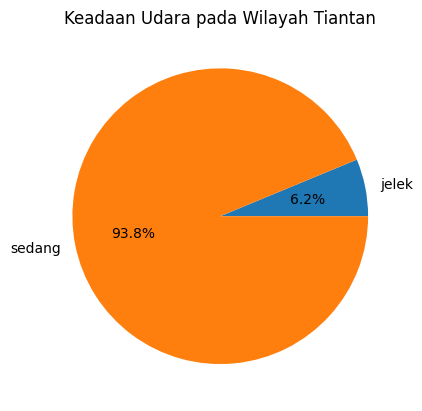

In [48]:
air_condition_df=month_df.groupby(by='air_condition').agg({
    'PM10' : 'count',
})

plt.pie(x=air_condition_df.PM10,
        autopct='%1.1f%%',
        labels=('jelek','sedang')
        )
plt.title('Keadaan Udara pada Wilayah Tiantan')
plt.show()

### Apakah curah hujan mempengaruhi nilai dari PM10 ?




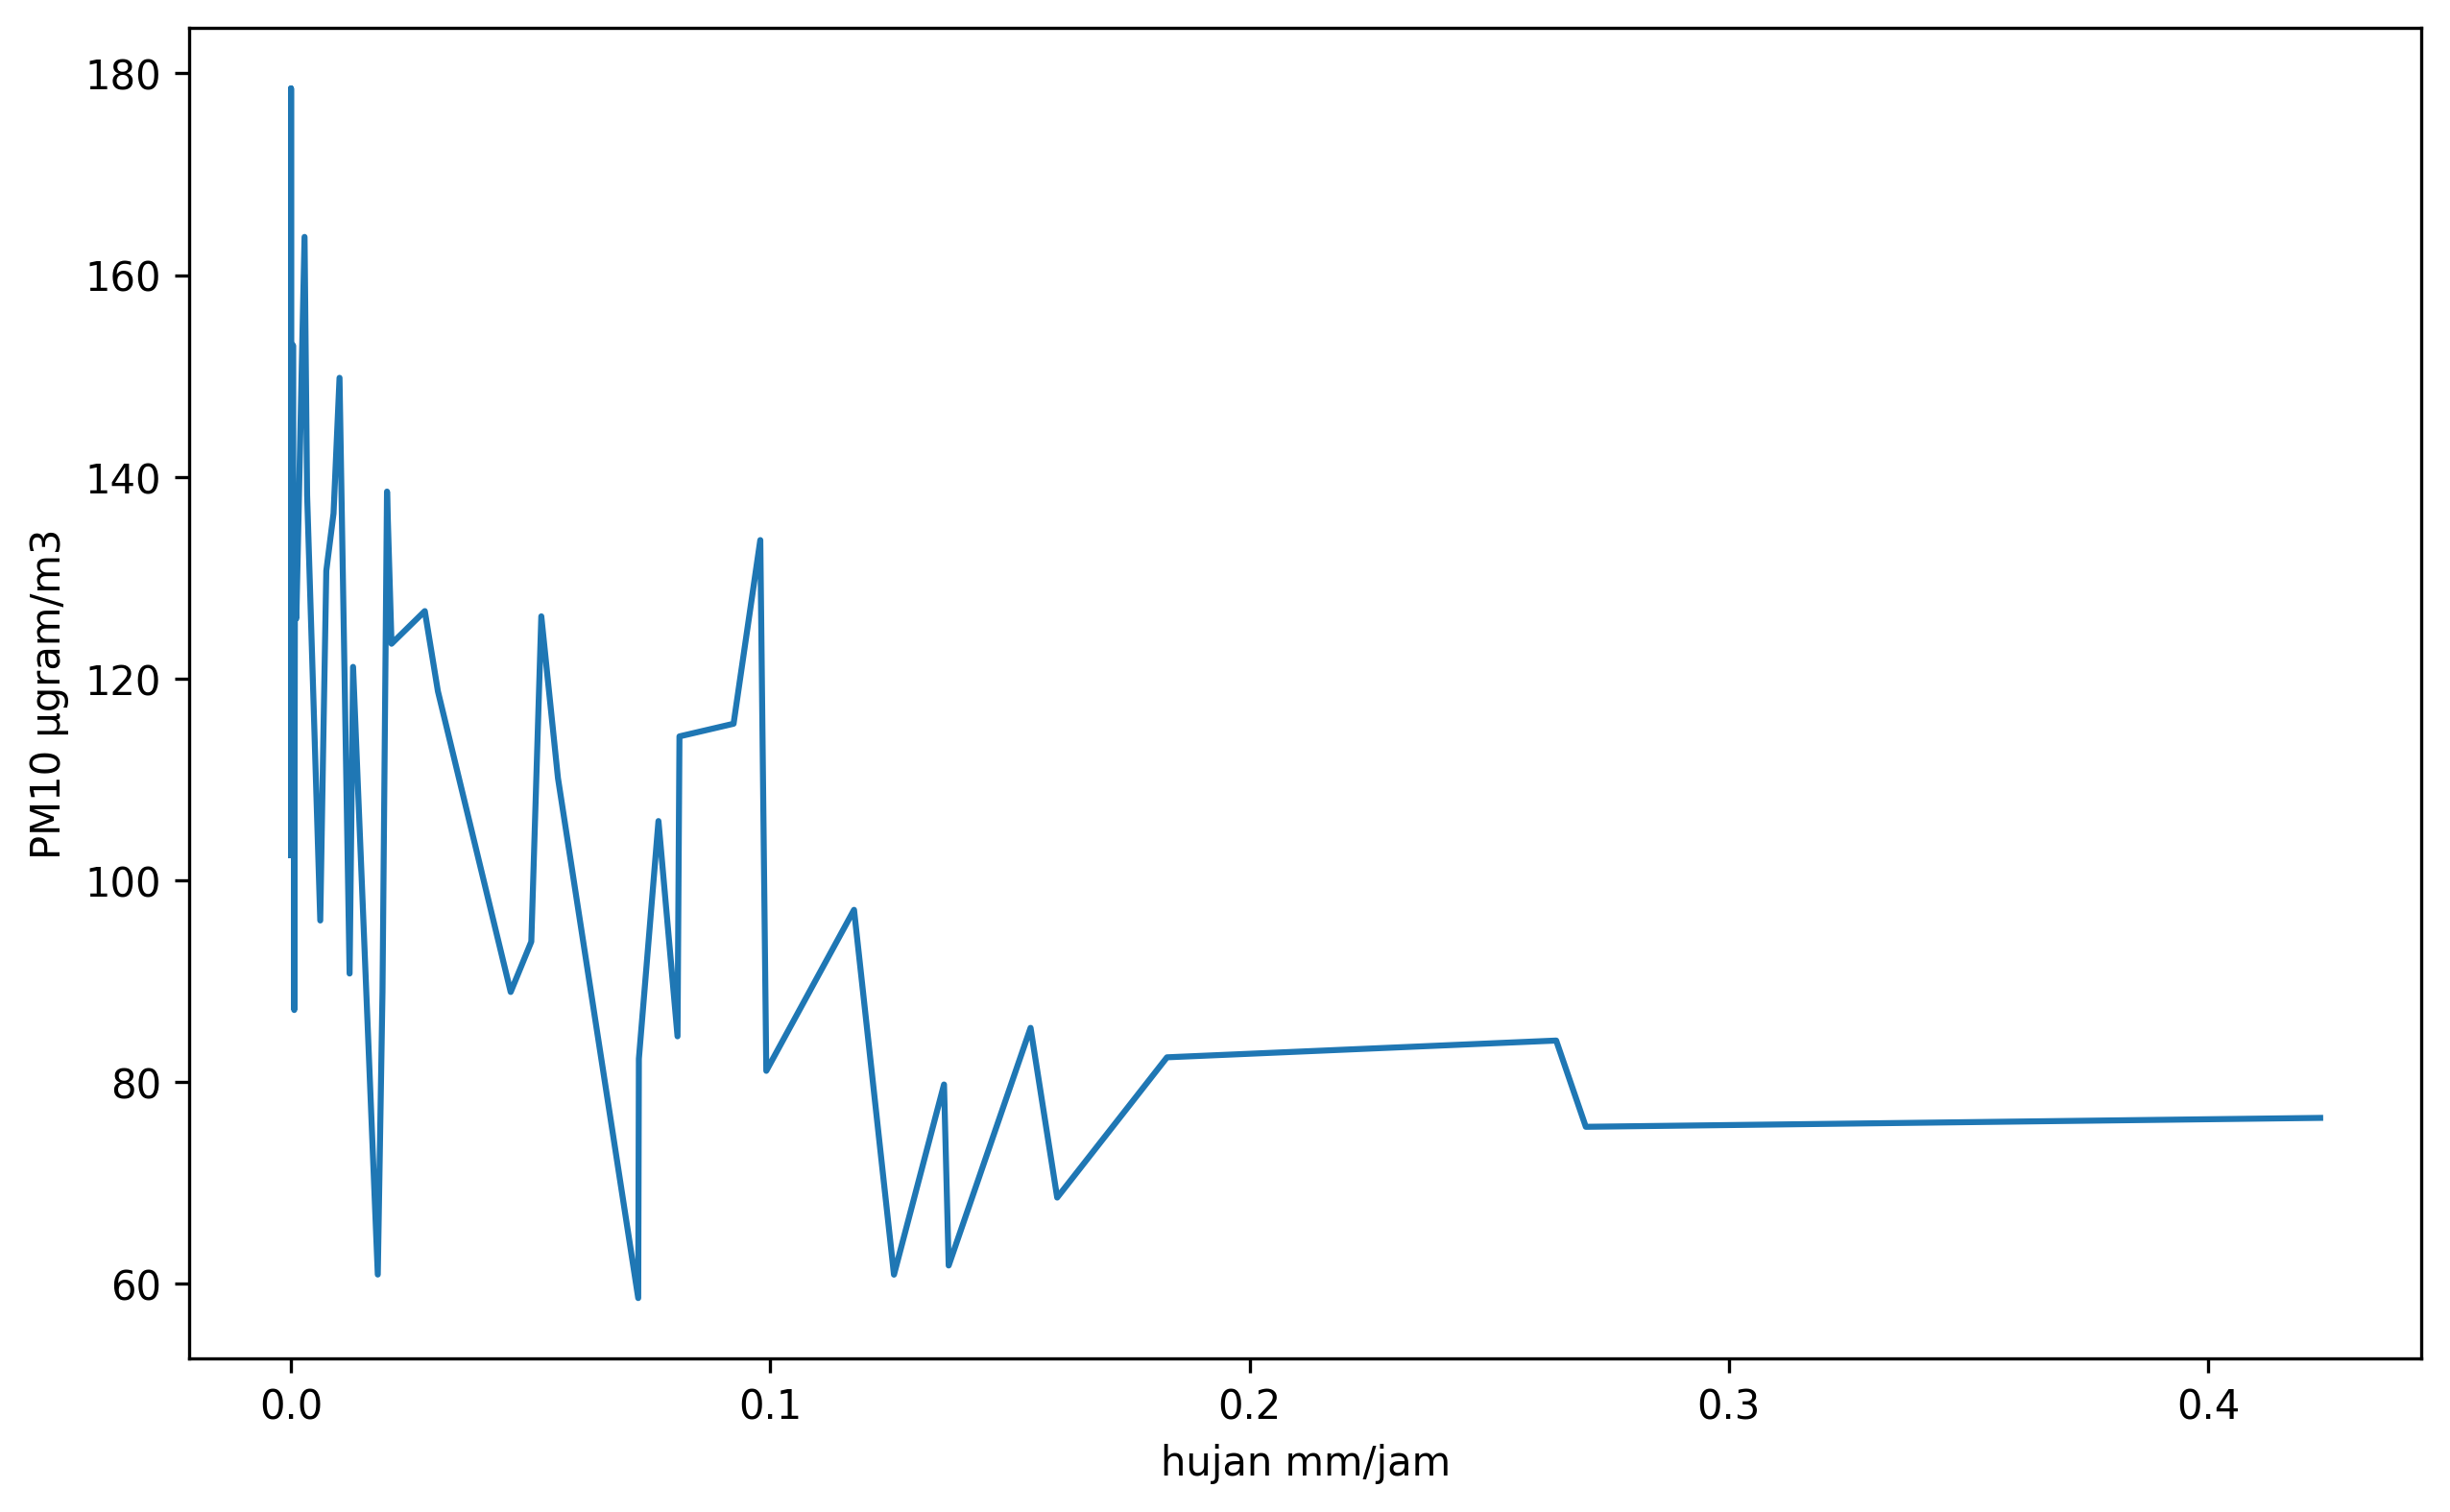

In [49]:
rain = month_df.sort_values(by=['RAIN'])
plt.figure(figsize=(10,6),dpi=300)

plt.plot(rain.RAIN,rain.PM10)
plt.xlabel("hujan mm/jam")
plt.ylabel("PM10 µgram/m3")

plt.show()

### - bagaimana pengaruh O3 dengan temperature udara ?

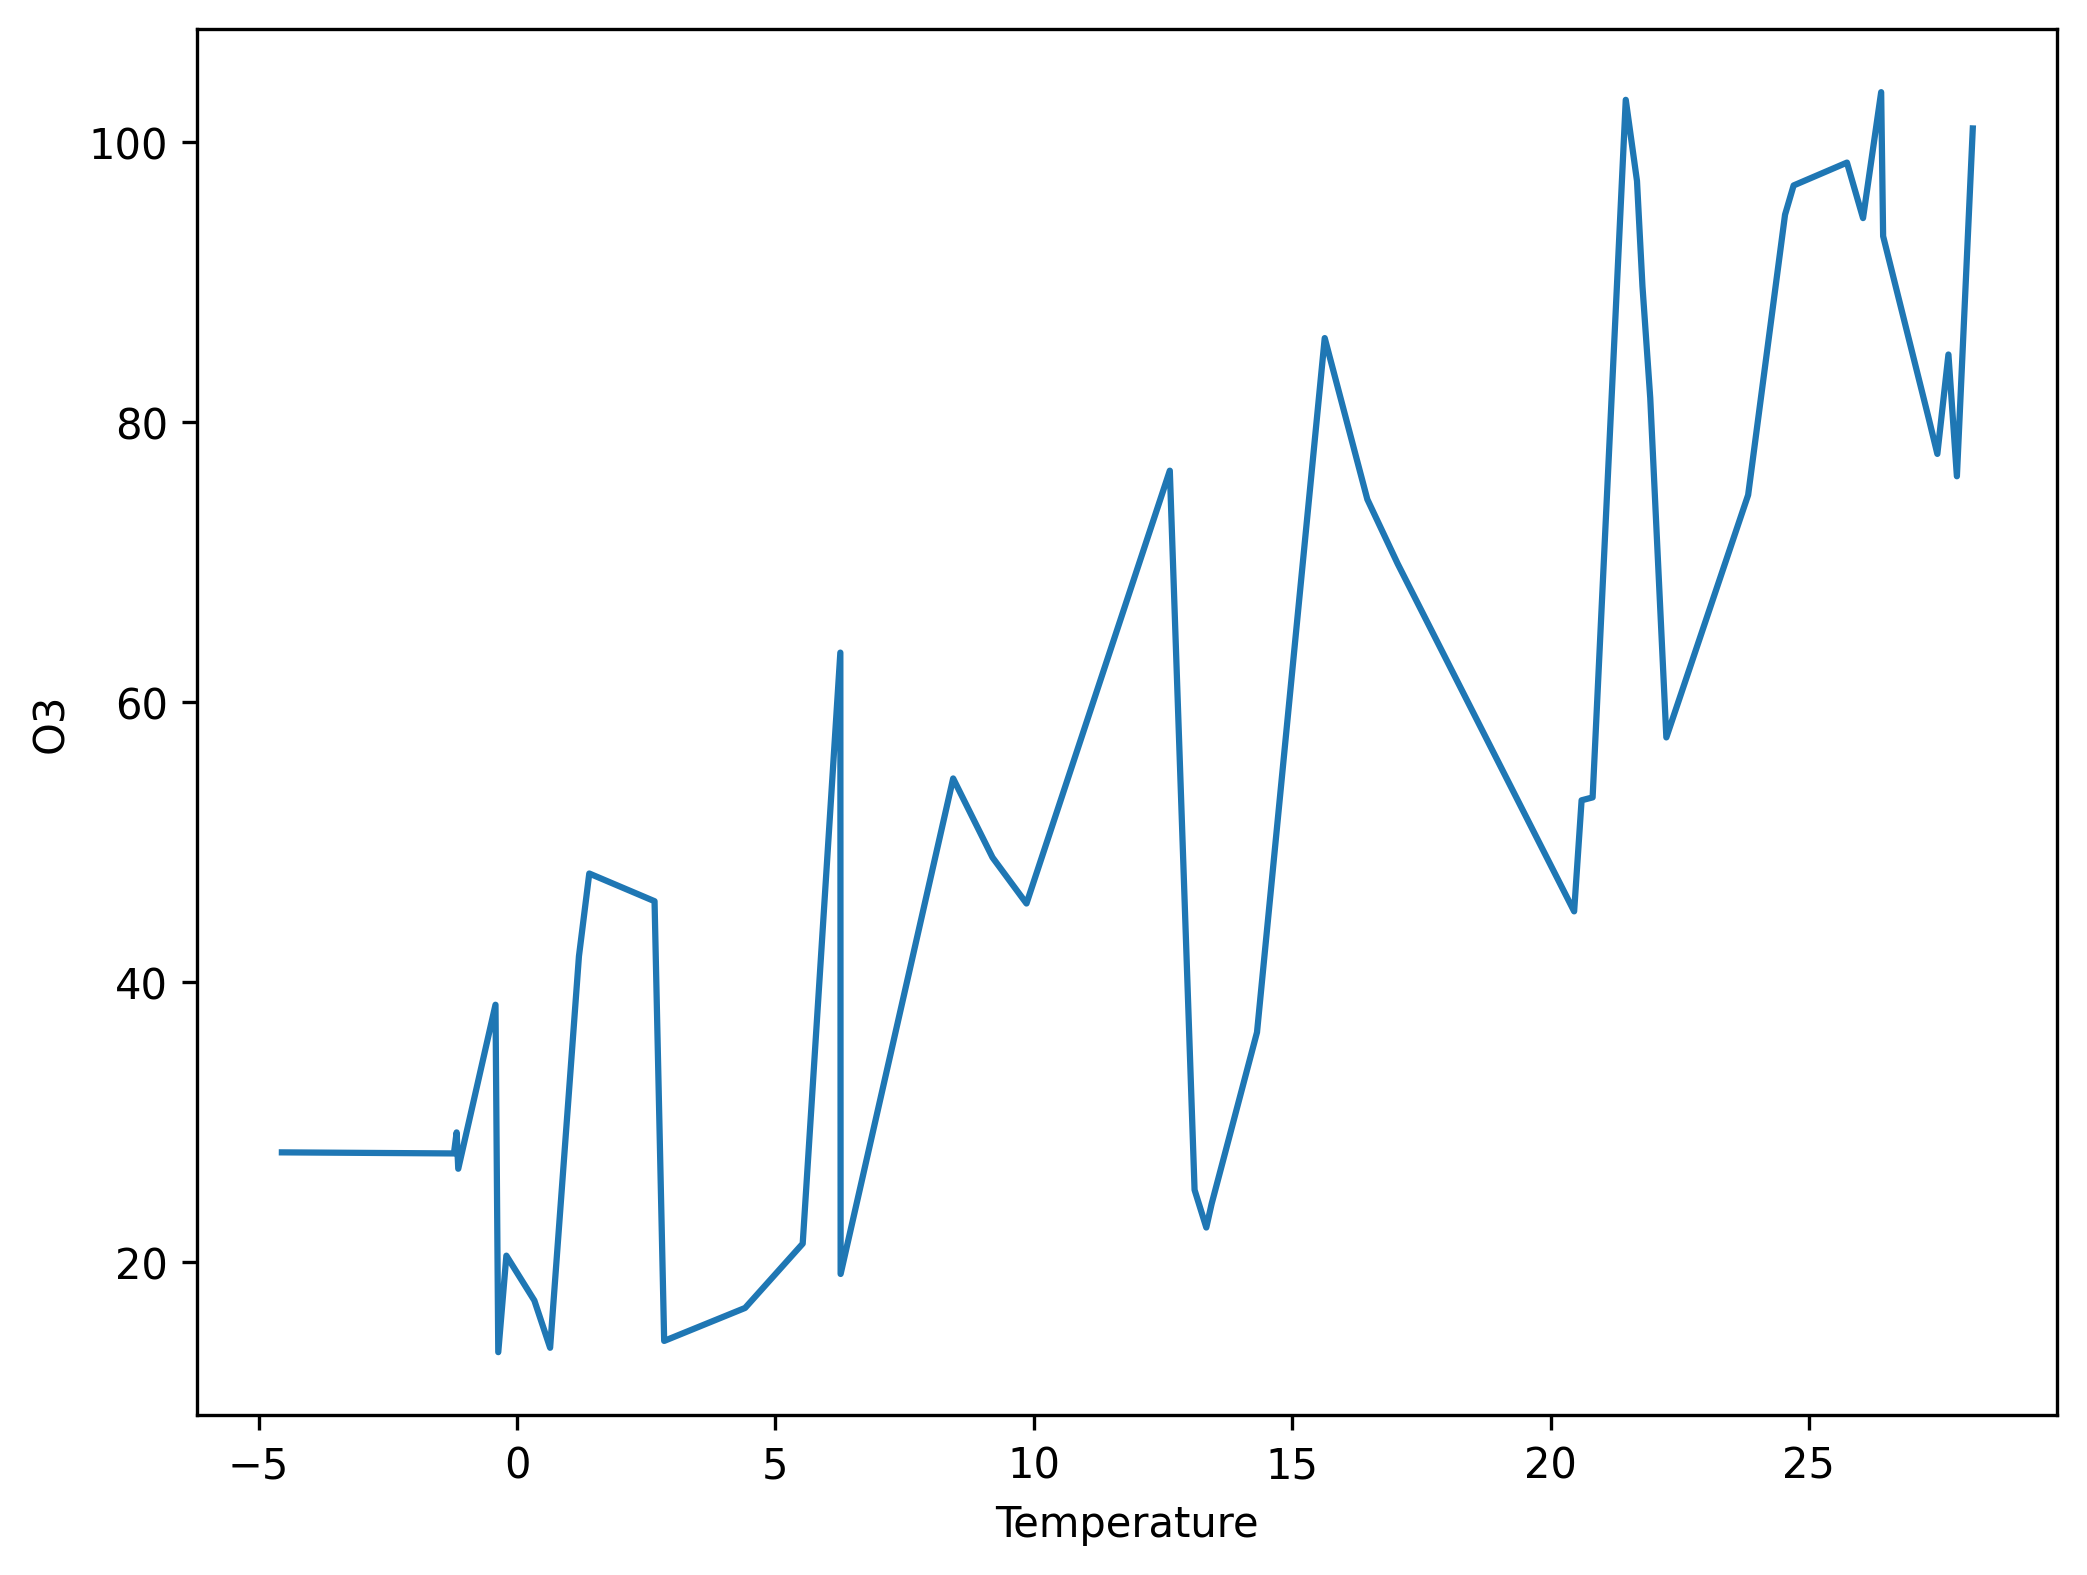

In [50]:
Temperature = month_df.sort_values(by=['TEMP'])
plt.figure(figsize=(8,6),dpi=300)

plt.plot(Temperature.TEMP,Temperature.O3)

plt.xlabel('Temperature')
plt.ylabel('O3')
plt.show()

**Insight:**
- Dari Piechart pertanyaan pertama dapat diketahui bahwa wilayah stasiun Tiantan ini memiliki kondisi udara yang didominasi oleh keadaan sedang
- pada linechart pertanyaan kedua dapat diperoleh informasi bahwa semakin tinggi intensitas hujan maka partikel udara akan mengecl
- temperature dan O3 memiliki hubungan yang erat

## Analisis Lanjutan (Opsional)

## Conclusion

- Apakah wilayah ini terjadi polusi udara ?

  Ya, wilayah ini dalam keadaan yang kurang baik ditunjukkan bahwa dalam 5 tahun kualitas udara tidak menunjukan keadaan yang baik dikarenakan nilai PM10 selalu tinggi

- Apakah curah hujan mempengaruhi nilai dari PM10 ?

  Ya, curah hujan lah yang mempengaruhi tinggi dari nilai PM10 ketika curah hujan mulai tinggi nilai PM10 akan ditunjukkan semakin sedikit dan jika curah hujan sedang rendah maka nilai dari PM10 akan melonjak sangat tinggi sehingga kualitas udara akan memburuk

- bagaimana pengaruh O3 dengan temperature udara ?

  nilai O3 mempunyai pengaruh besar terhadap temperature udara dapat dilihat bahwa semakin tinggi nilai dari O3 maka temperature akan semakin naik dan jika nilai O3 sedang rendah maka temperature akan semakin dingin